# Starbucks Data Visualisation using Seaborn



In [2]:
#importing libraries
import pandas as pd
import matplotlib
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data and removing white space
df_DrinkMenu = pd.read_csv('starbucks_drinkMenu_expanded.csv', encoding="ISO-8859-1", low_memory=False)
df_DrinkMenu.columns = df_DrinkMenu.columns.str.strip()
df_DrinkMenu.head(10)

Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks   CaffÃ¨ Latte  Short Nonfat Milk        70   
5  Classic Espresso Drinks   CaffÃ¨ Latte            2% Milk       100   
6  Classic Espresso Drinks   CaffÃ¨ Latte            Soymilk        70   
7  Classic Espresso Drinks   CaffÃ¨ Latte   Tall Nonfat Milk       100   
8  Classic Espresso Drinks   CaffÃ¨ Latte            2% Milk       150   
9  Classic Espresso Drinks   CaffÃ¨ Latte            Soymilk       110   

  Total Fat (g)  Trans Fat (g)  Saturated Fat (g)  Sodium (mg)  \
0           0.1            0.0                0.0            0   
1           0.1            0.0                0.0            0   
2           0.1            0.0                0.0            0   
3           0.1            0.0                0.0            0   
4           0.1            0.1                0.0            5   
5           3.5            2.0                0.1           15   
6           2.5            0.4                0.0            0   
7           0.2            0.2                0.0            5   
8             6            3.0                0.2           25   
9           4.5            0.5                0.0            0   

   Total Carbohydrates (g)  Cholesterol (mg)  Dietary Fibre (g)  Sugars (g)  \
0                        5                 0                  0           0   
1                       10                 0                  0           0   
2                       10                 0                  0           0   
3                       10                 0                  0           0   
4                       75                10                  0           9   
5                       85                10                  0           9   
6                       65                 6                  1           4   
7                      120                15                  0          14   
8                      135                15                  0          14   
9                      105                10                  1           6   

   Protein (g) Vitamin A (% DV) Vitamin C (% DV) Calcium (% DV) Iron (% DV)  \
0          0.3               0%               0%             0%          0%   
1          0.5               0%               0%             0%          0%   
2          1.0               0%               0%             0%          0%   
3          1.0               0%               0%             2%          0%   
4          6.0              10%               0%            20%          0%   
5          6.0              10%               0%            20%          0%   
6          5.0               6%               0%            20%          8%   
7         10.0              15%               0%            30%          0%   
8         10.0              15%               0%            30%          0%   
9          8.0              10%               0%            30%         15%   

  Caffeine (mg)  
0           175  
1           260  
2           330  
3           410  
4            75  
5            75  
6            75  
7            75  
8            75  
9            75

In [4]:
df_DrinkMenu = df_DrinkMenu.replace({'Caffeine (mg)': {'Varies': None, 'varies': None}})

In [5]:
df_DrinkMenu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

## Challenge 1

What visualisations for the coffee data are possible and most appropriate? What are the pros and cons?


In [6]:
df_DrinkMenu.shape

(242, 18)

In [7]:
#sorting data for plotting
Sorted_df_DrinkMenu = df_DrinkMenu.sort_values(by=['Calories'], ascending=True)
Sorted_df_DrinkMenu.duplicated().sum()
Sorted_df_DrinkMenu.drop_duplicates(inplace=True)

In [8]:
df_DrinkMenu.calories = Sorted_df_DrinkMenu[['Beverage_category','Calories']]
df_DrinkMenu.calories.columns = ['DrinkMenu', 'Calories']
df_DrinkMenu.calories

/tmp/ipykernel_259/1235676699.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_DrinkMenu.calories = Sorted_df_DrinkMenu[['Beverage_category','Calories']]


DrinkMenu  Calories
102             TazoÂ® Tea Drinks         0
103             TazoÂ® Tea Drinks         0
104             TazoÂ® Tea Drinks         0
105             TazoÂ® Tea Drinks         0
0                          Coffee         3
..                            ...       ...
128             TazoÂ® Tea Drinks       450
83      Signature Espresso Drinks       450
85      Signature Espresso Drinks       460
215  FrappuccinoÂ® Blended Coffee       460
84      Signature Espresso Drinks       510

[242 rows x 2 columns]

## DATA VISUALISATION



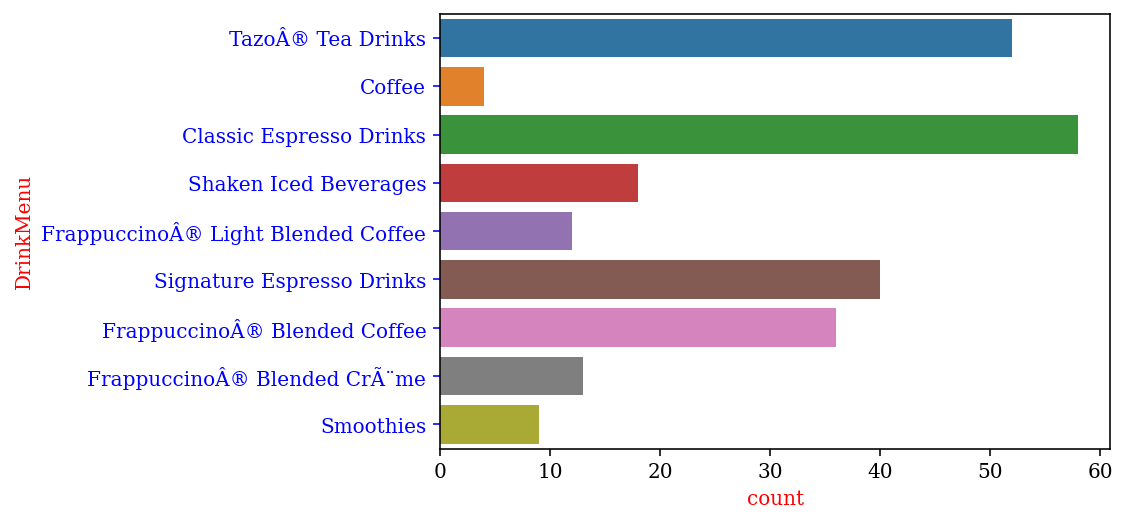

In [12]:
#Countplot, horizontal bar
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set_style({'ytick.color': 'blue'})
sns.set_style({'axes.labelcolor': 'red'})
#sns.reset_defaults()
plot = sns.countplot(y='DrinkMenu', data=df_DrinkMenu.calories)

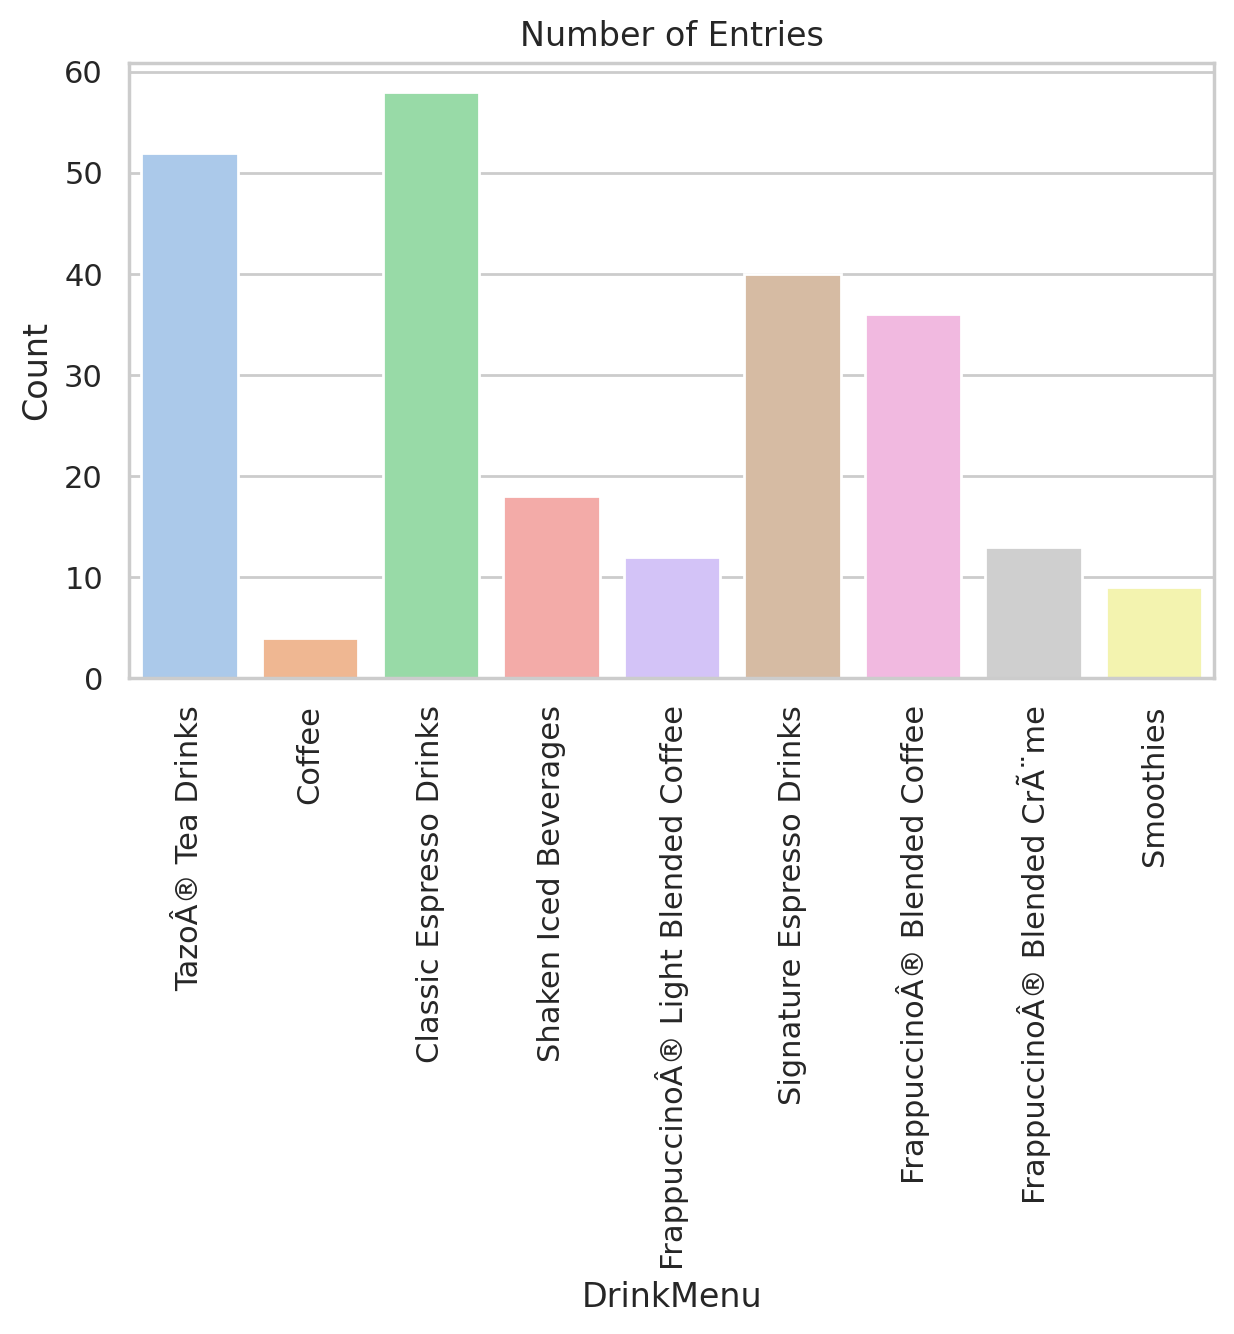

In [17]:
#countplot, vertical bar
plt.figure(figsize=(7,4))
sns.reset_defaults()
sns.set_theme()
sns.set_theme(style="whitegrid", palette="pastel")
plot = sns.countplot(x='DrinkMenu', data=df_DrinkMenu.calories)
plot.set(xlabel='DrinkMenu', ylabel='Count', title='Number of Entries')
plt.xticks(rotation=90)
plt.show()

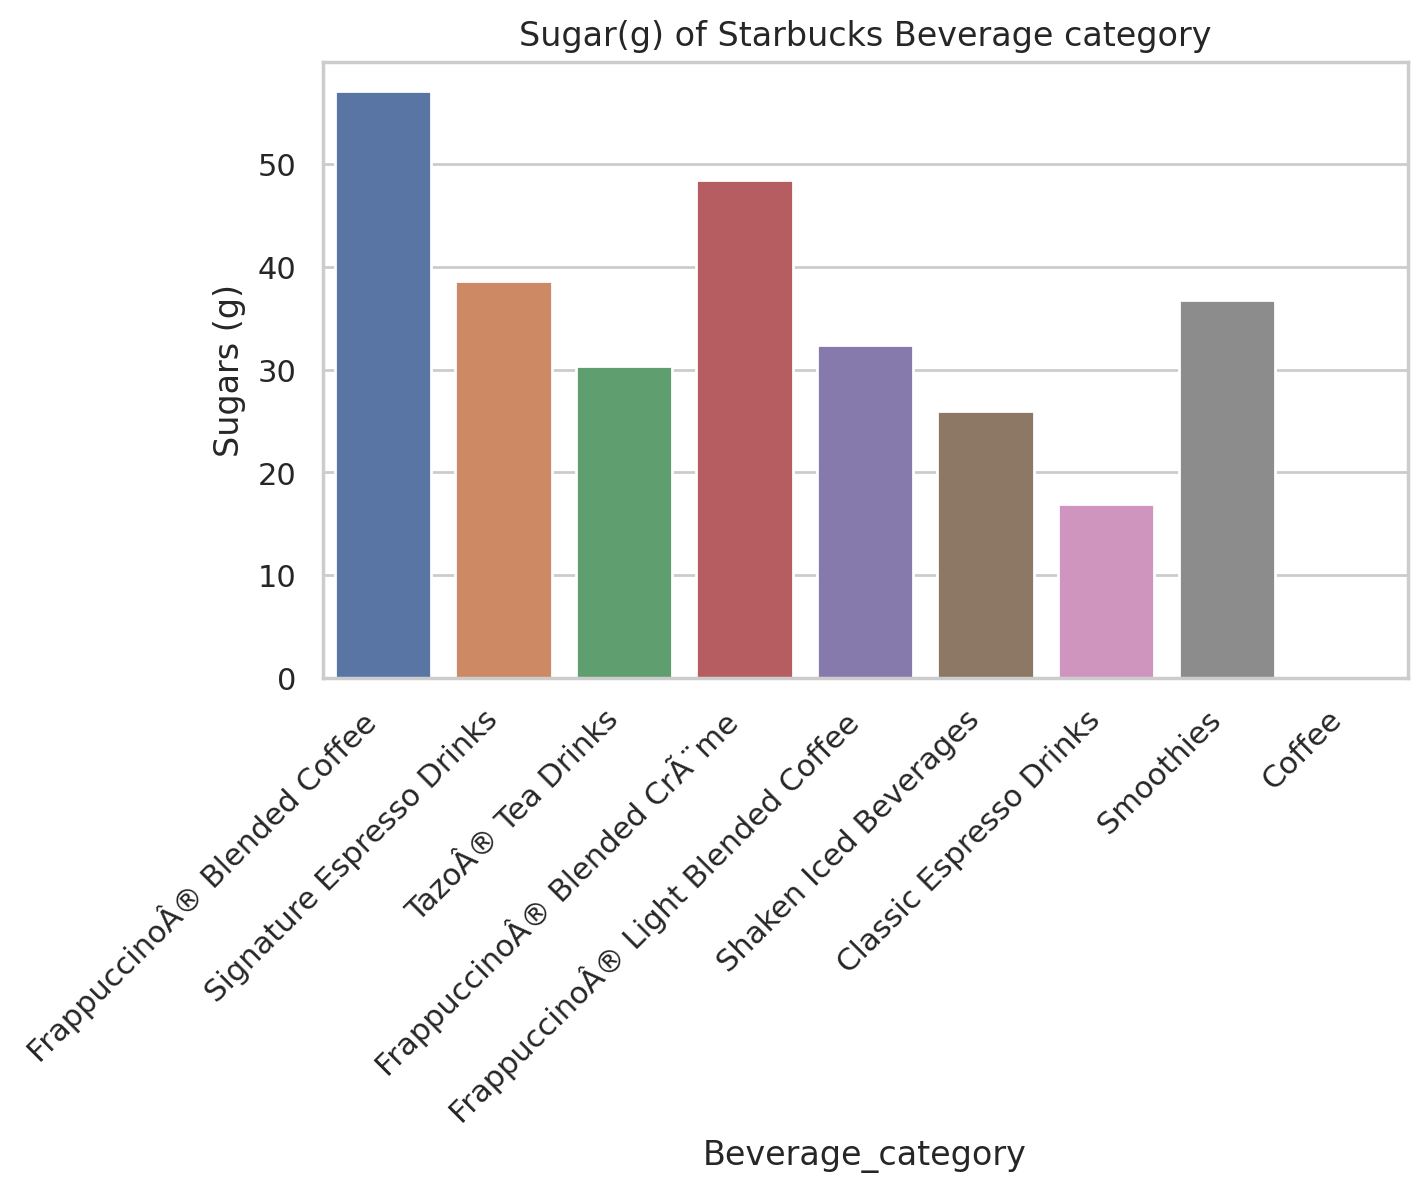

In [22]:
#Sugar level by category
plt.figure(figsize=(7,4))
sns.barplot(x="Beverage_category", y="Sugars (g)", errorbar = None, data=Sorted_df_DrinkMenu.sort_values("Sugars (g)", ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title("Sugar(g) of Starbucks Beverage category")
plt.show()

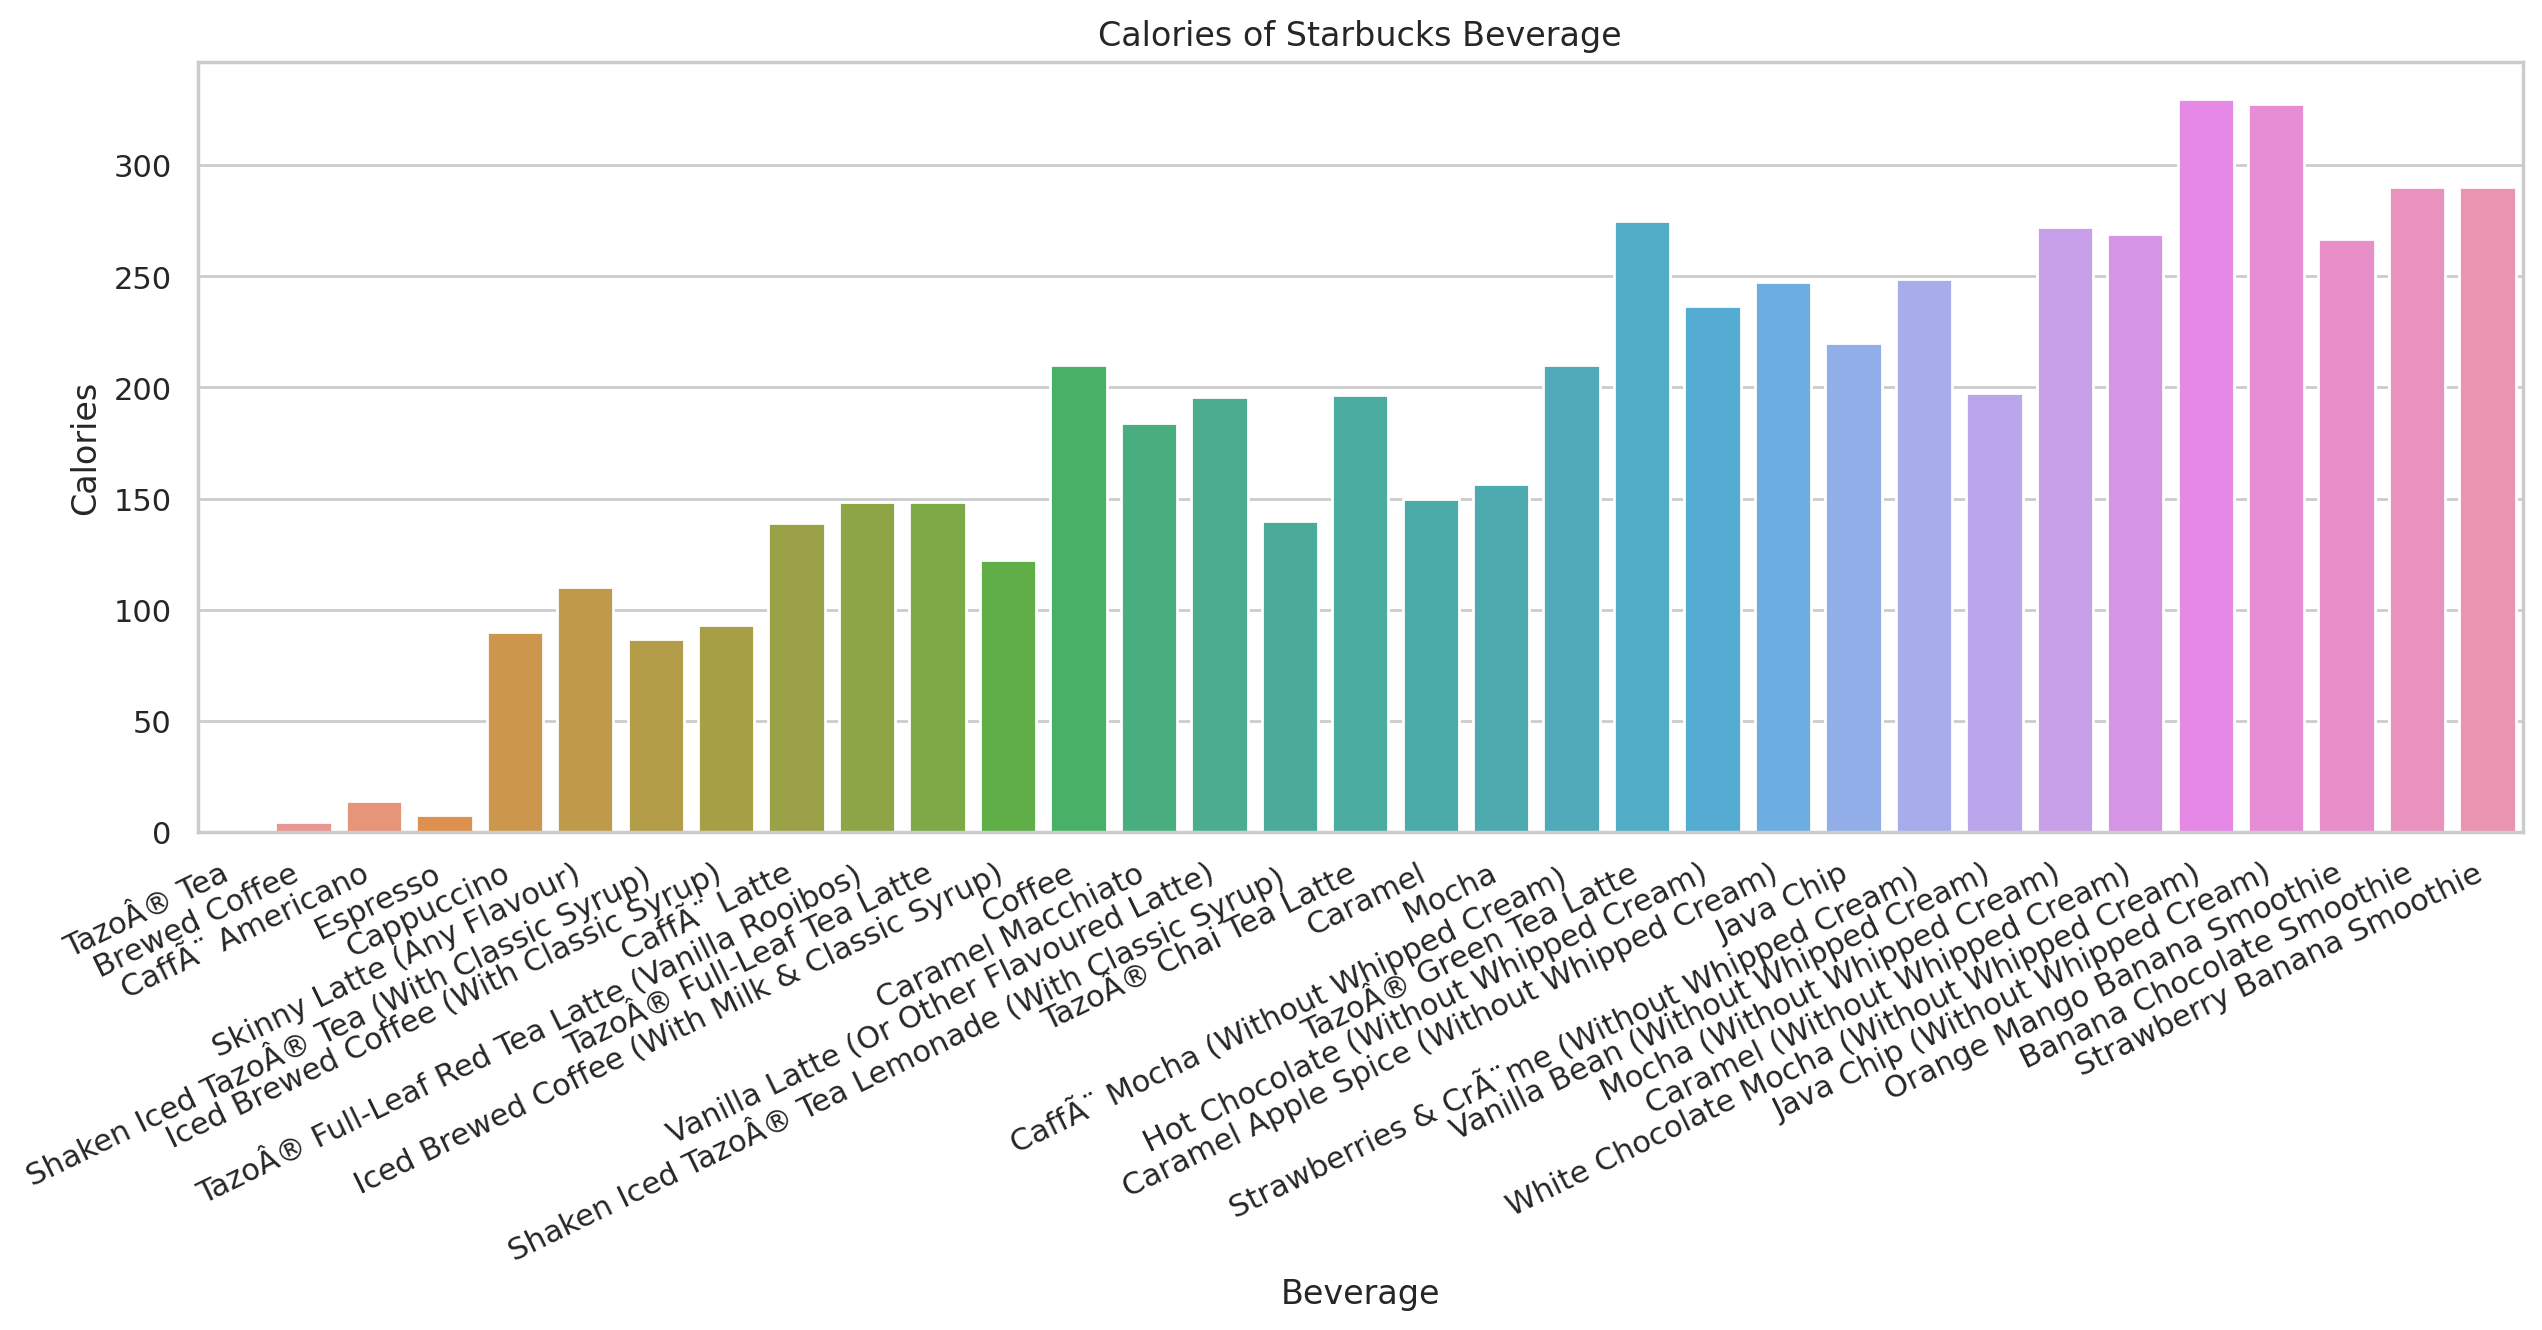

In [19]:
#Barplot for each Starbucks Beverage
plt.figure(figsize=(15, 5))
sns.barplot(x="Beverage", y="Calories", data=Sorted_df_DrinkMenu, errorbar = None)
plt.xticks(rotation=26, ha='right')
plt.title("Calories of Starbucks Beverage")
plt.show()

In [20]:
df_DrinkMenu['Caffeine (mg)'] = df_DrinkMenu['Caffeine (mg)'].apply(pd.to_numeric)

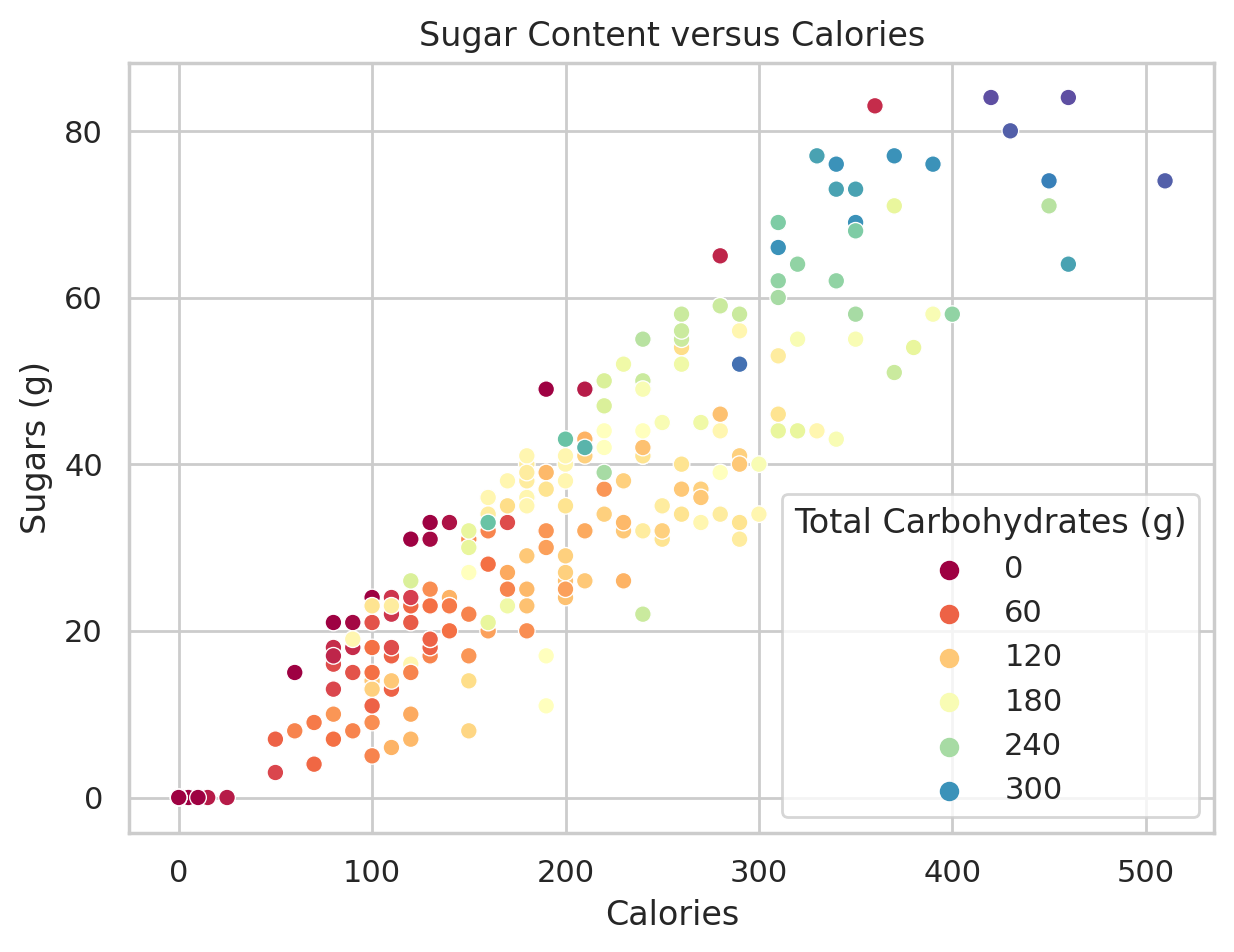

In [21]:
#scatter plot
plt.figure(figsize=(7, 5))
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df_DrinkMenu, x='Calories', y='Sugars (g)', hue='Total Carbohydrates (g)', palette='Spectral').set(xlabel='Calories', ylabel='Sugars (g)', title='Sugar Content versus Calories')
plt.show()

## Challenge 2

Toby is really sensitive to caffeine but has a sweet tooth

He refuses to read tables but is super proficient in reading charts / graphs.
Can you visualise the data to recommend Toby the best drink for him? \(10 min\)  



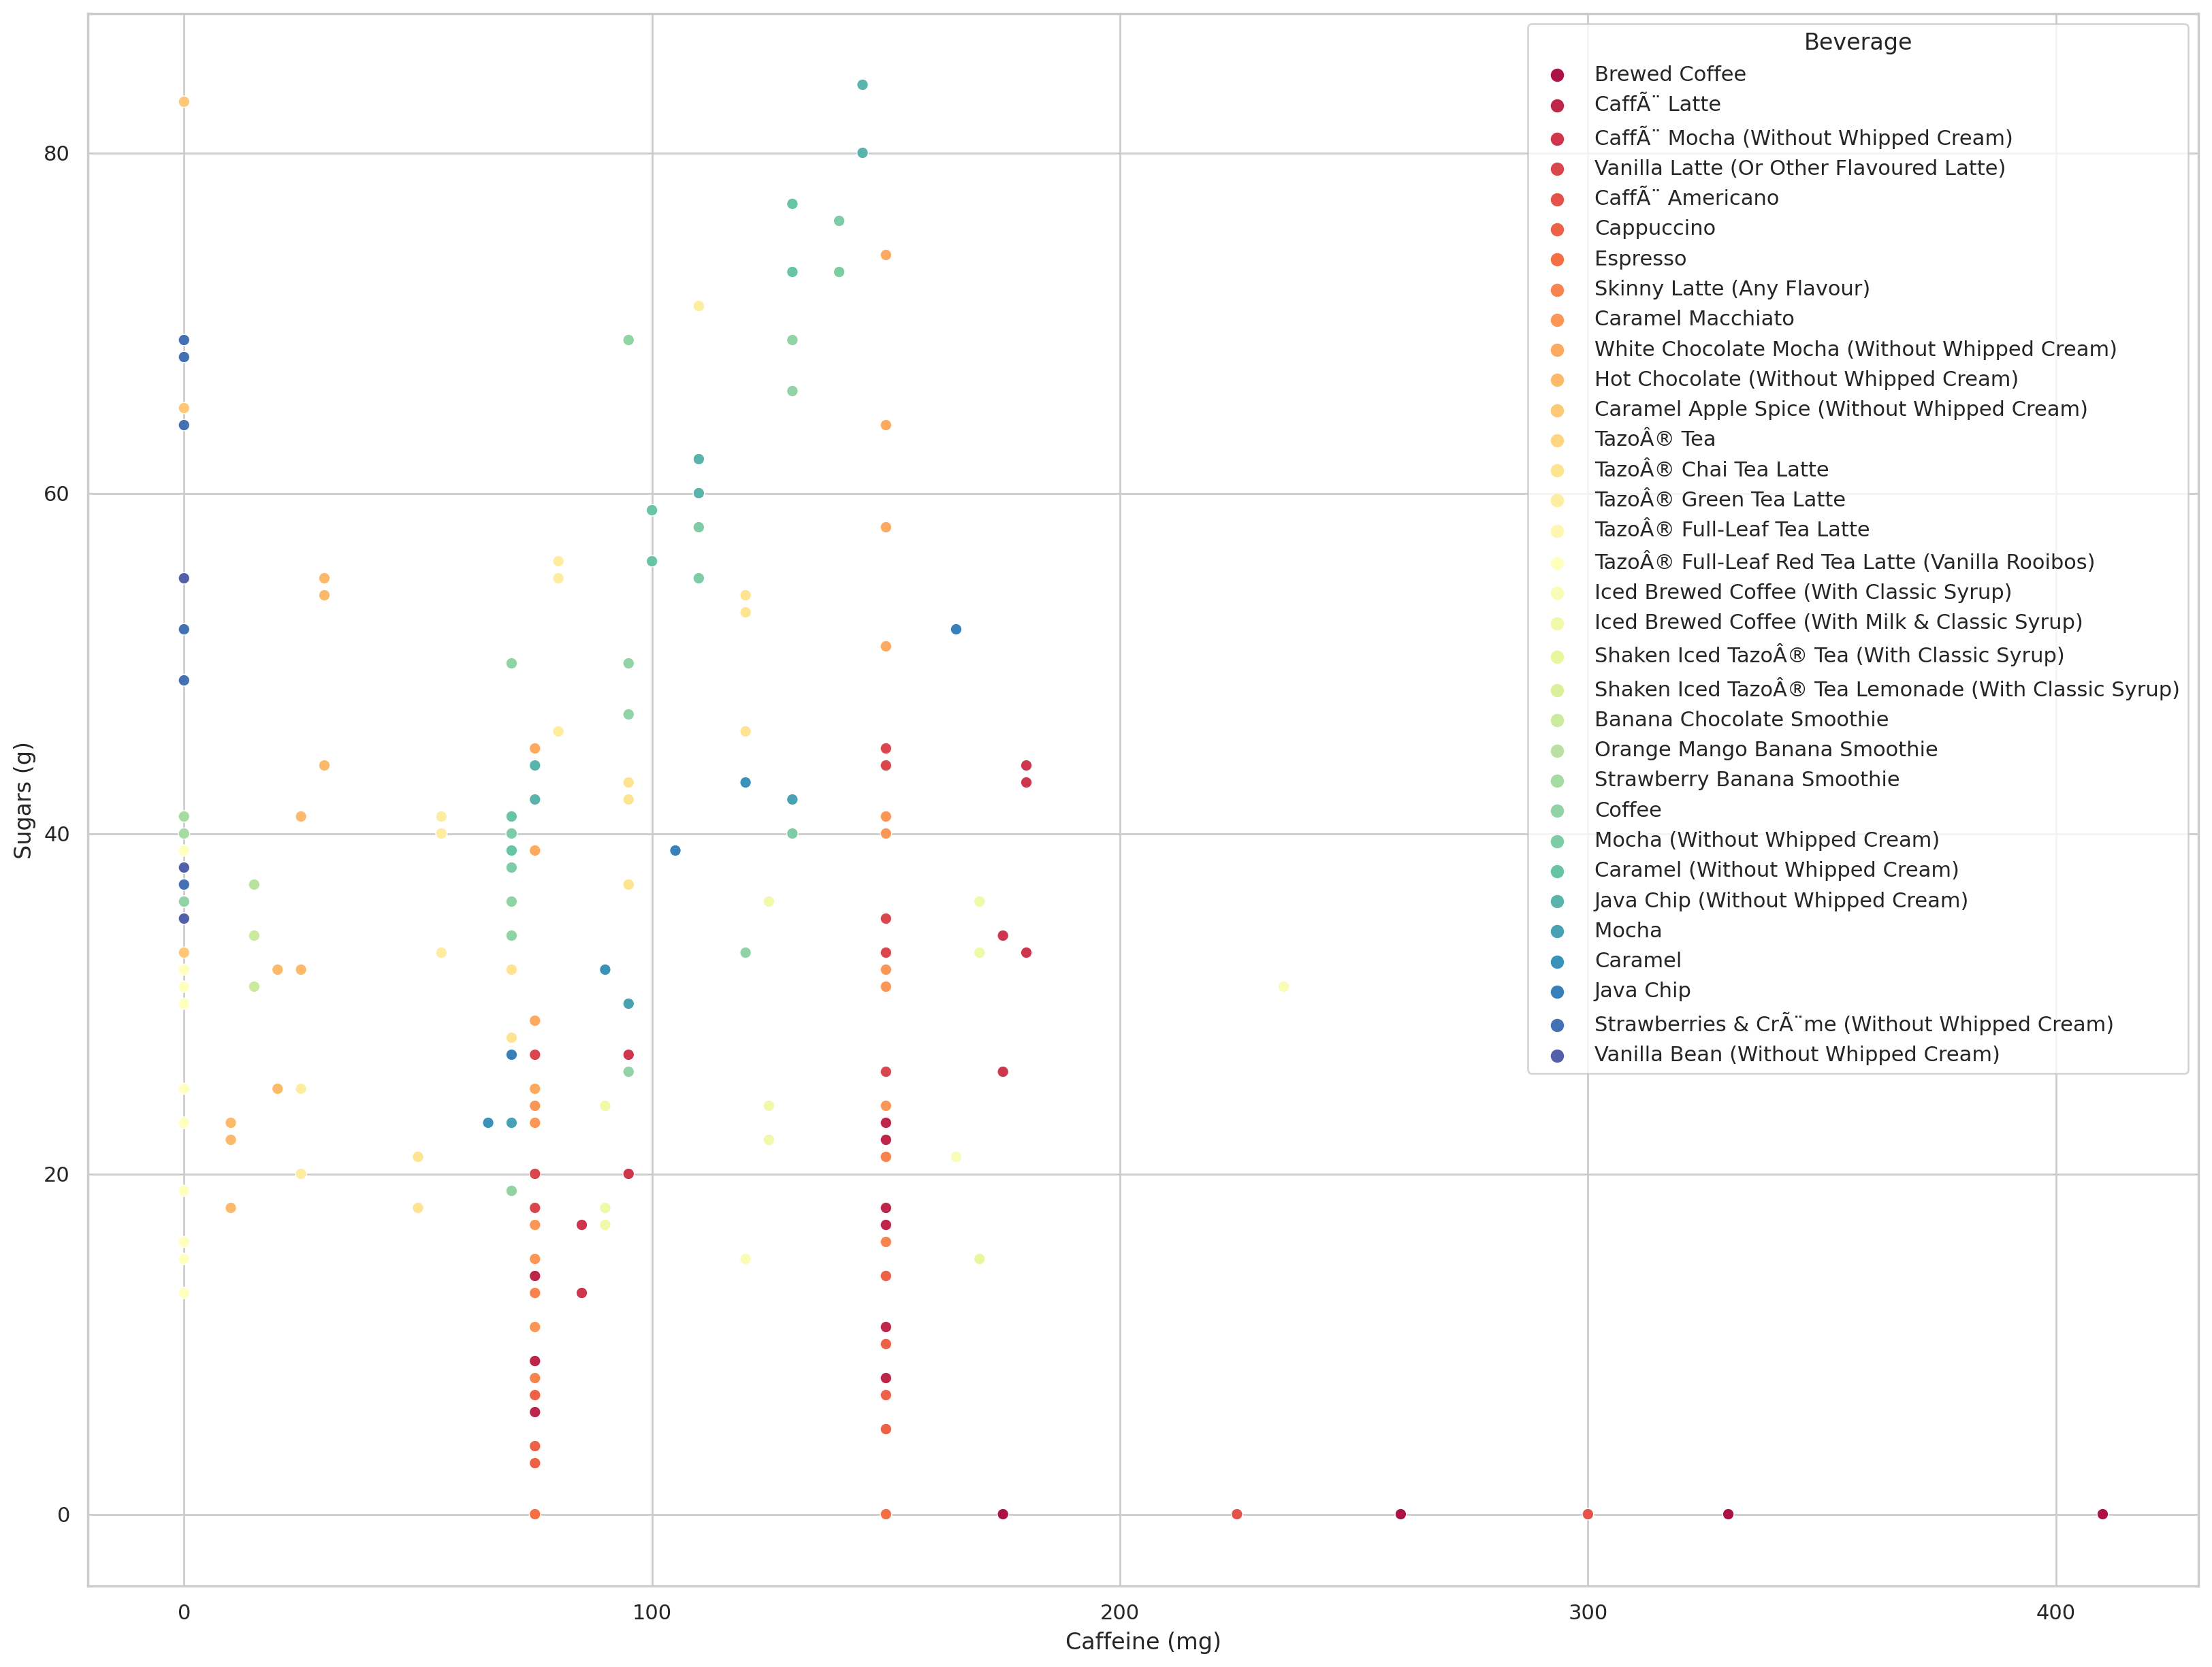

In [30]:
plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_DrinkMenu, x='Caffeine (mg)', y='Sugars (g)', hue='Beverage', palette='Spectral').set(xlabel='Caffeine (mg)')
plt.show()

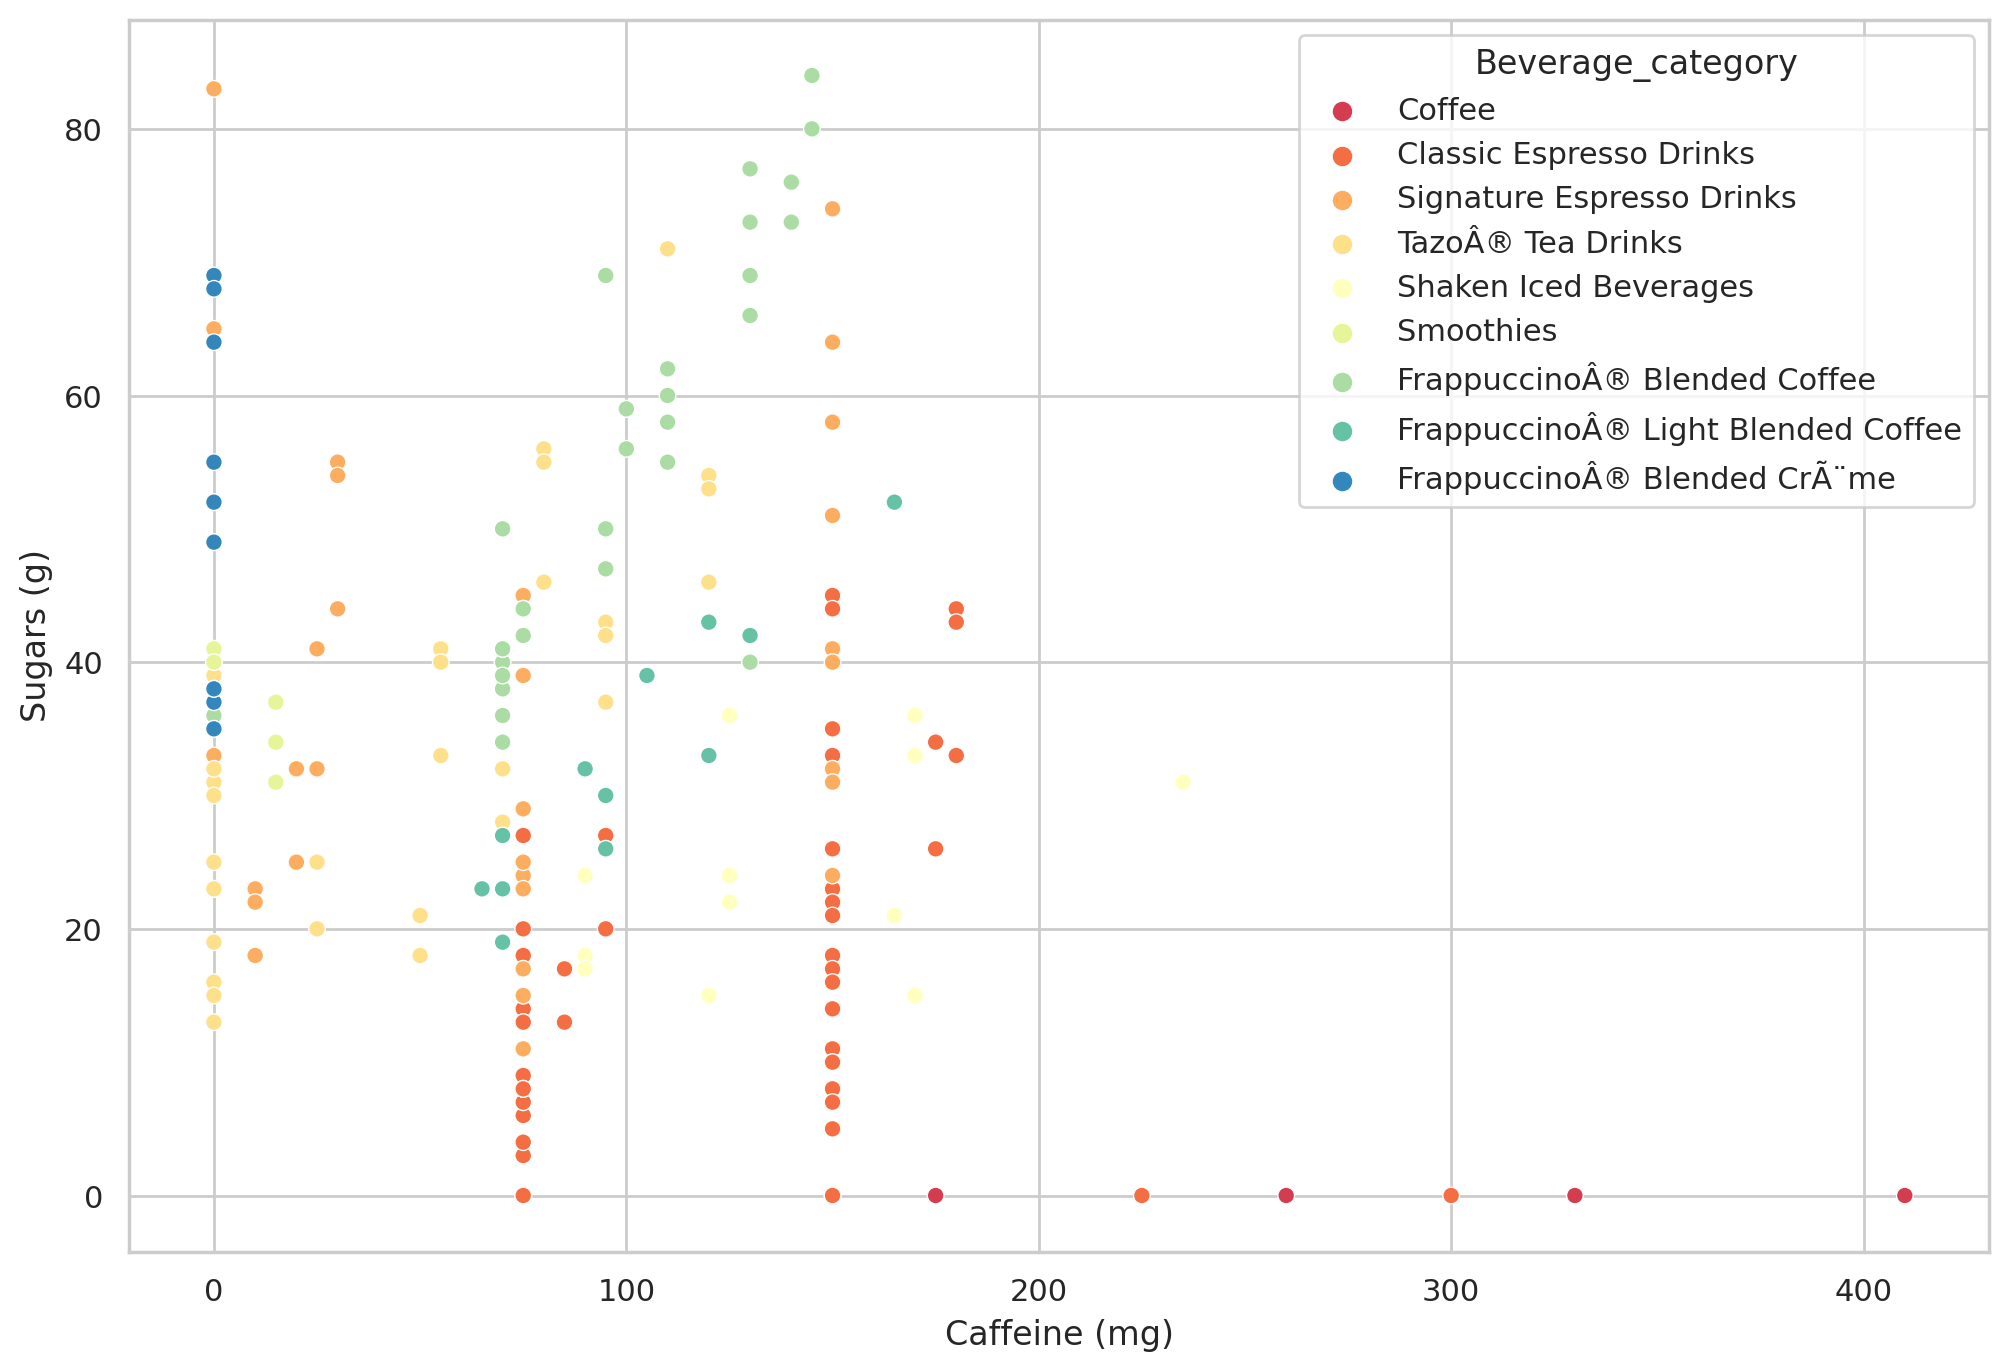

In [24]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.scatterplot(data=df_DrinkMenu, x='Caffeine (mg)', y='Sugars (g)', hue='Beverage_category', palette='Spectral').set(xlabel='Caffeine (mg)', ylabel='Sugars (g)')
plt.show()

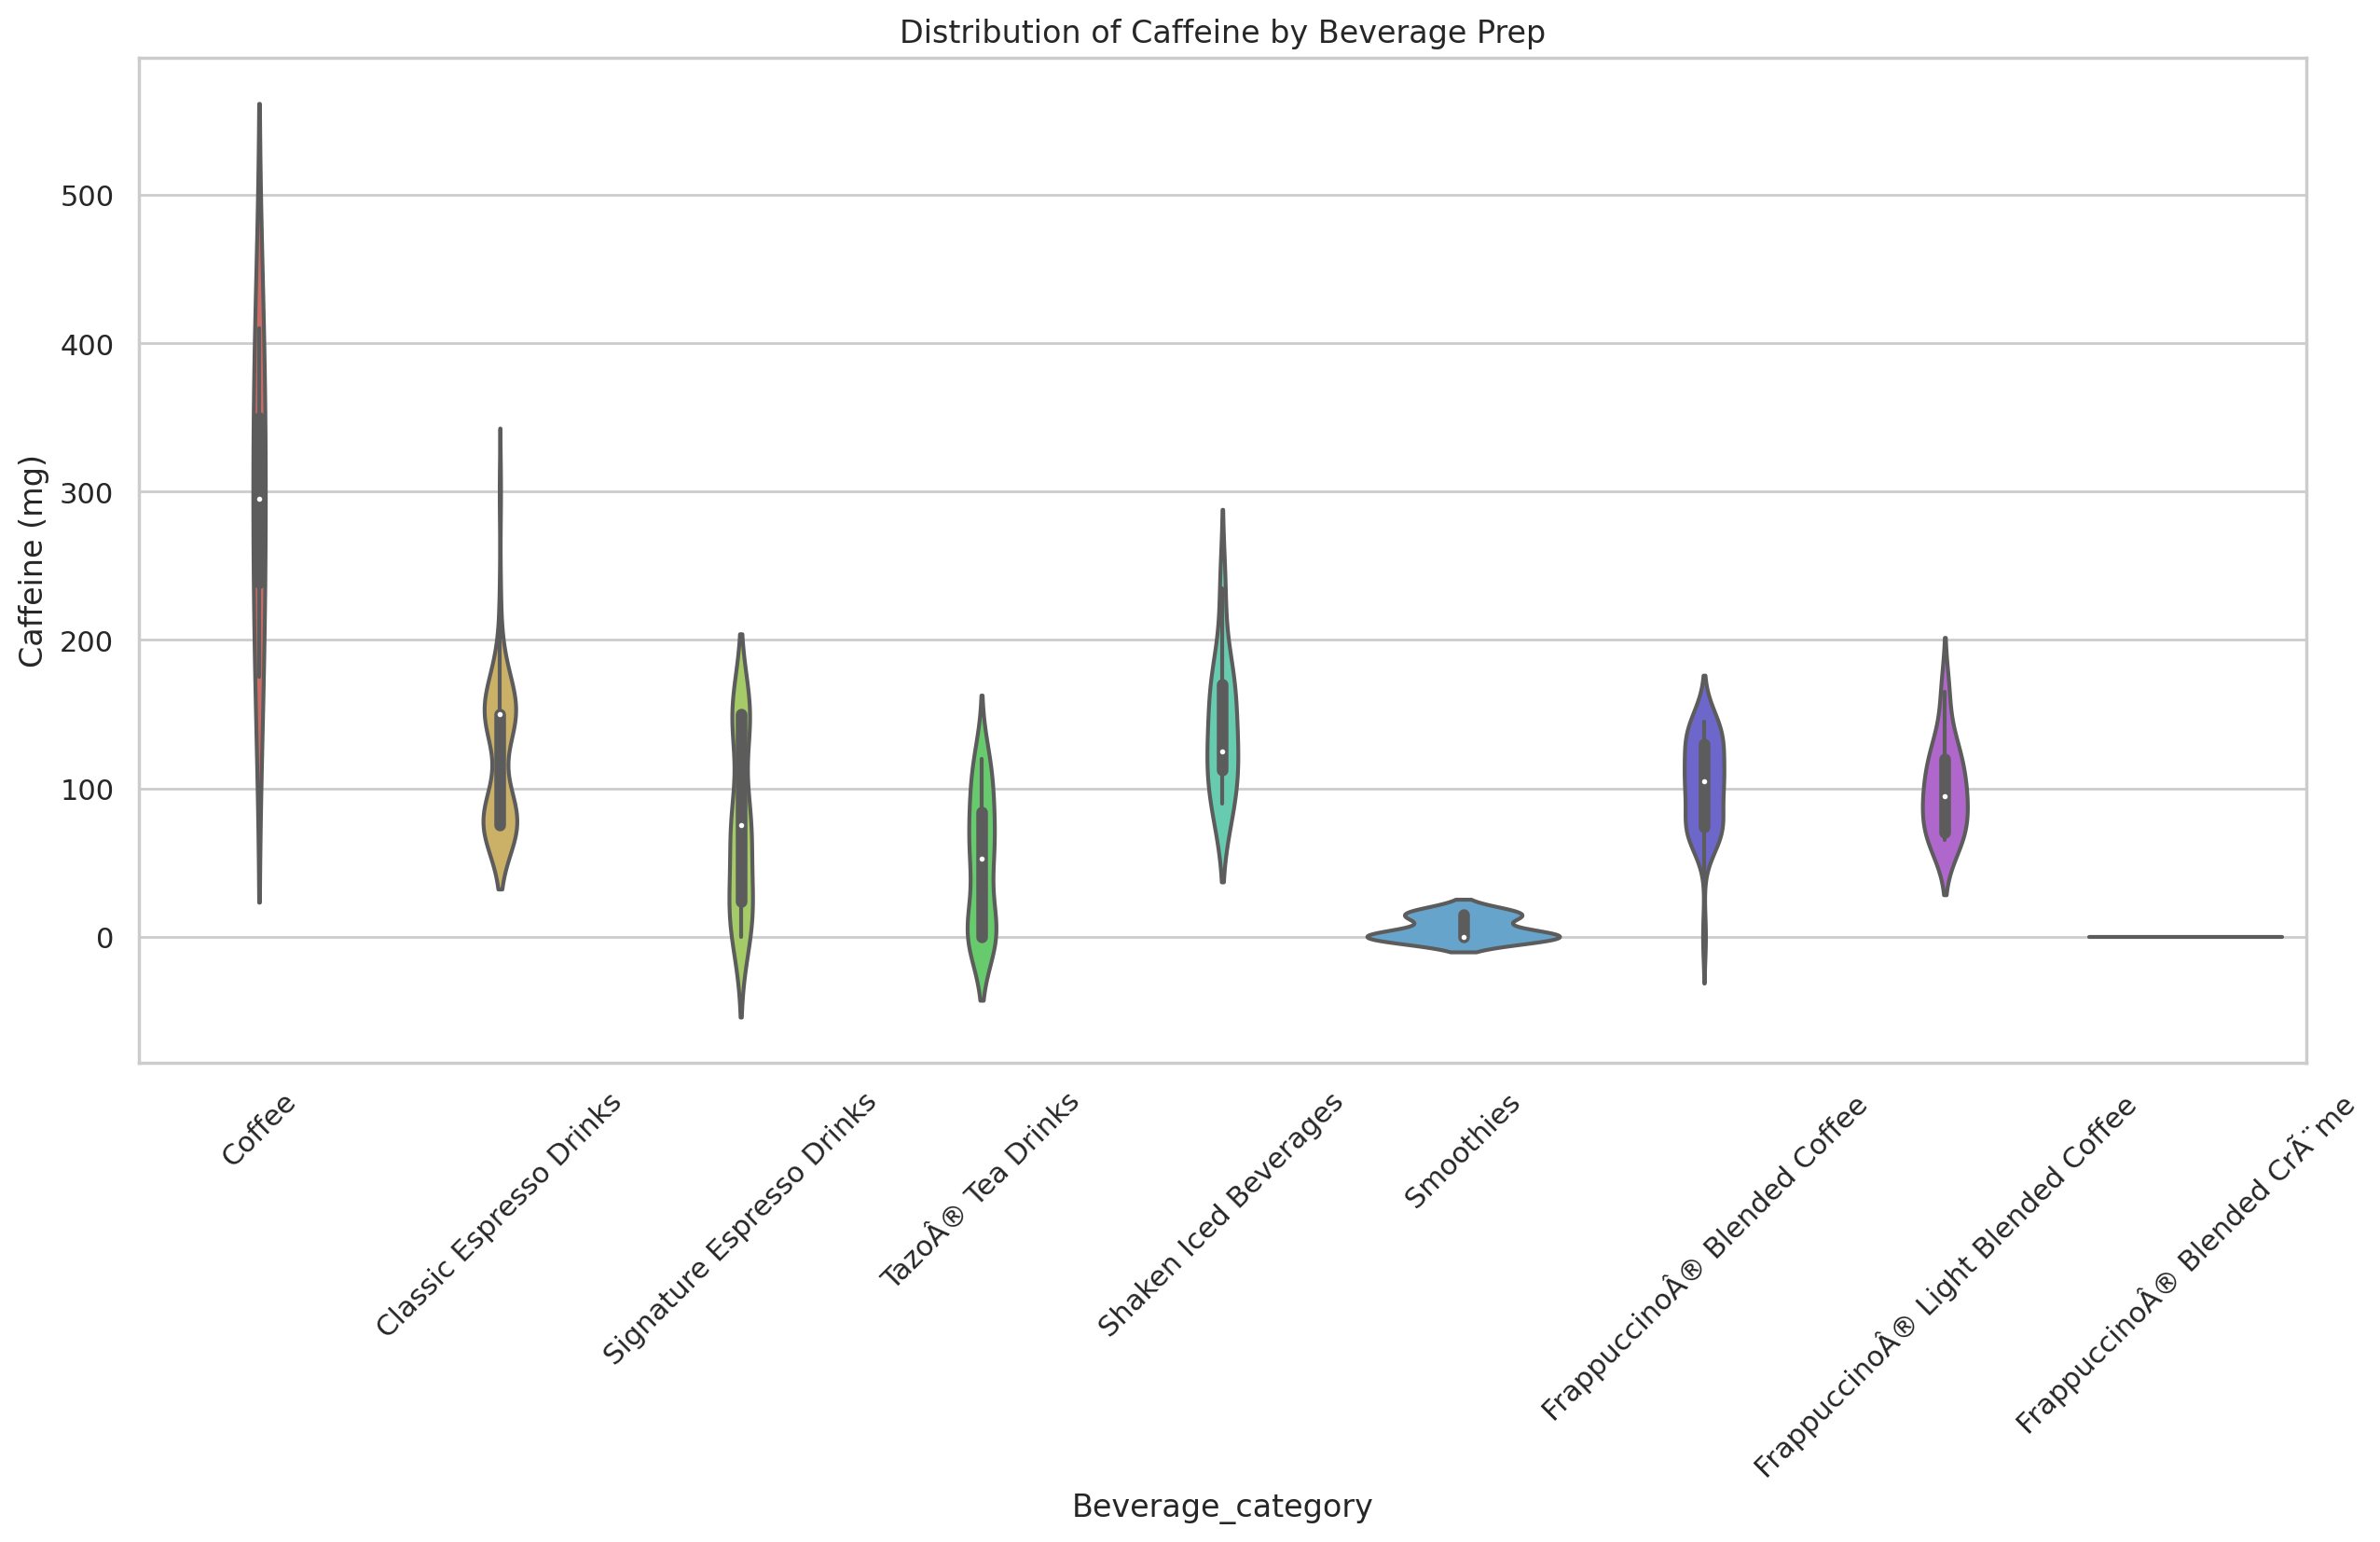

In [31]:
#violin plot
plt.figure(figsize=(15,7))
sns.set_theme(style='whitegrid')
sns.violinplot(data=df_DrinkMenu, x='Beverage_category', y='Caffeine (mg)', palette='hls').set(title='Distribution of Caffeine by Beverage Prep')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

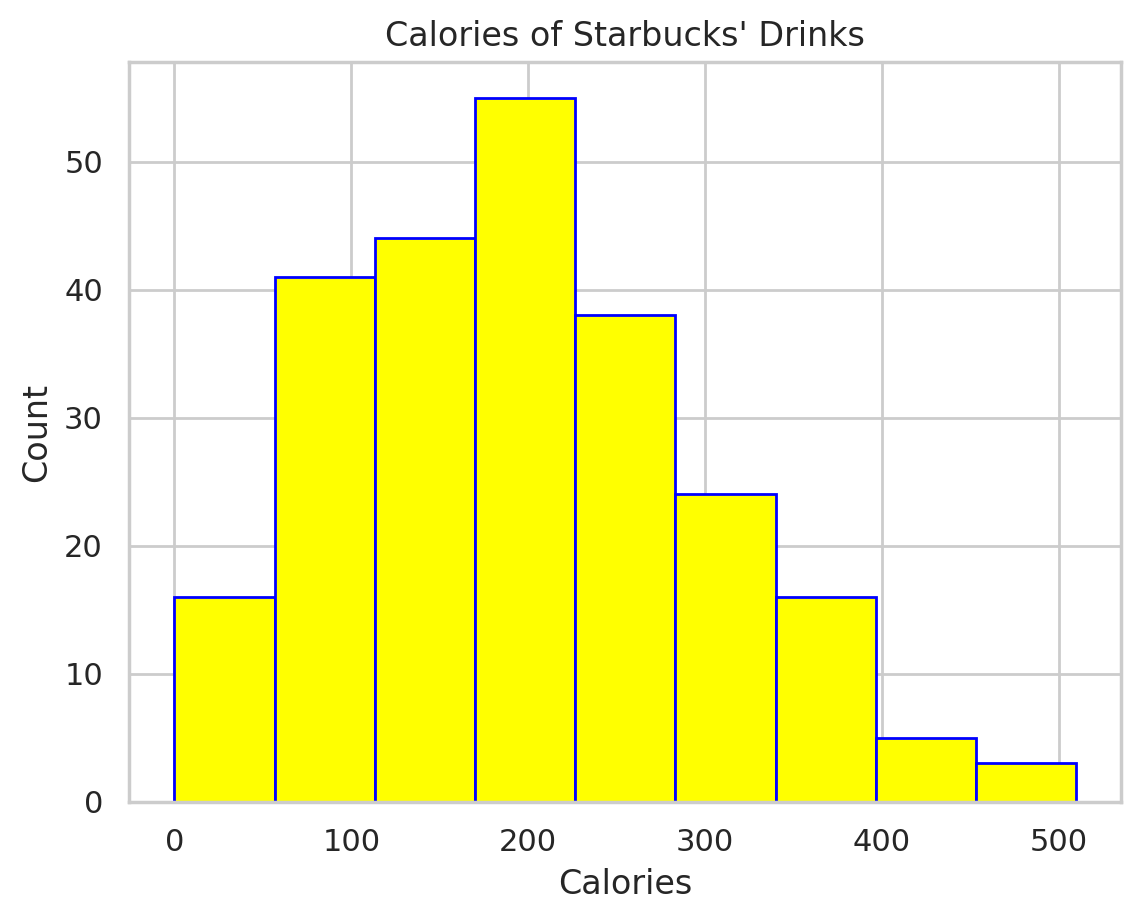

In [32]:
calories = df_DrinkMenu["Calories"]
plt.hist(calories, bins=9, edgecolor = "blue", color = "yellow")
plt.title("Calories of Starbucks' Drinks")
plt.xlabel("Calories")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

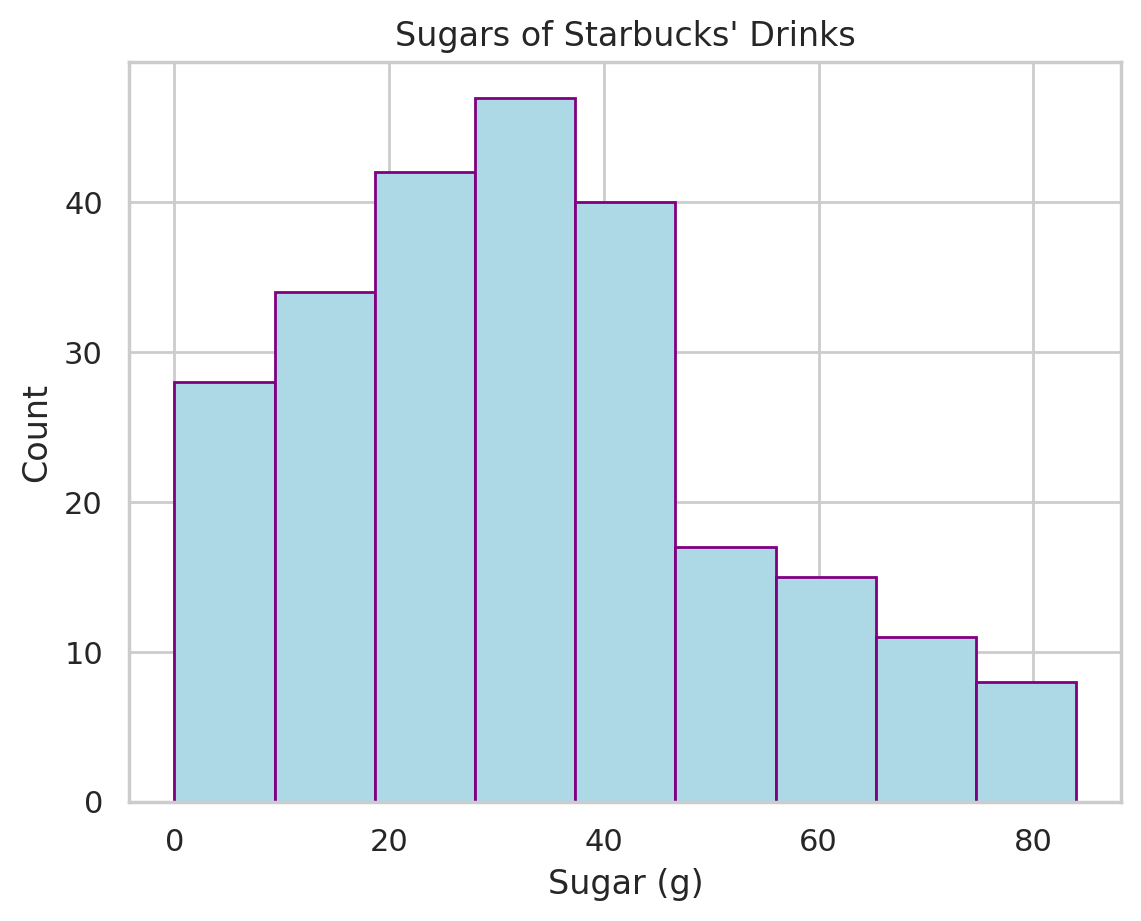

In [33]:
fat = df_DrinkMenu["Sugars (g)"]
plt.hist(fat, bins=9, edgecolor = "purple", color = "lightblue")
plt.title("Sugars of Starbucks' Drinks")
plt.xlabel("Sugar (g)")
plt.ylabel("Count")

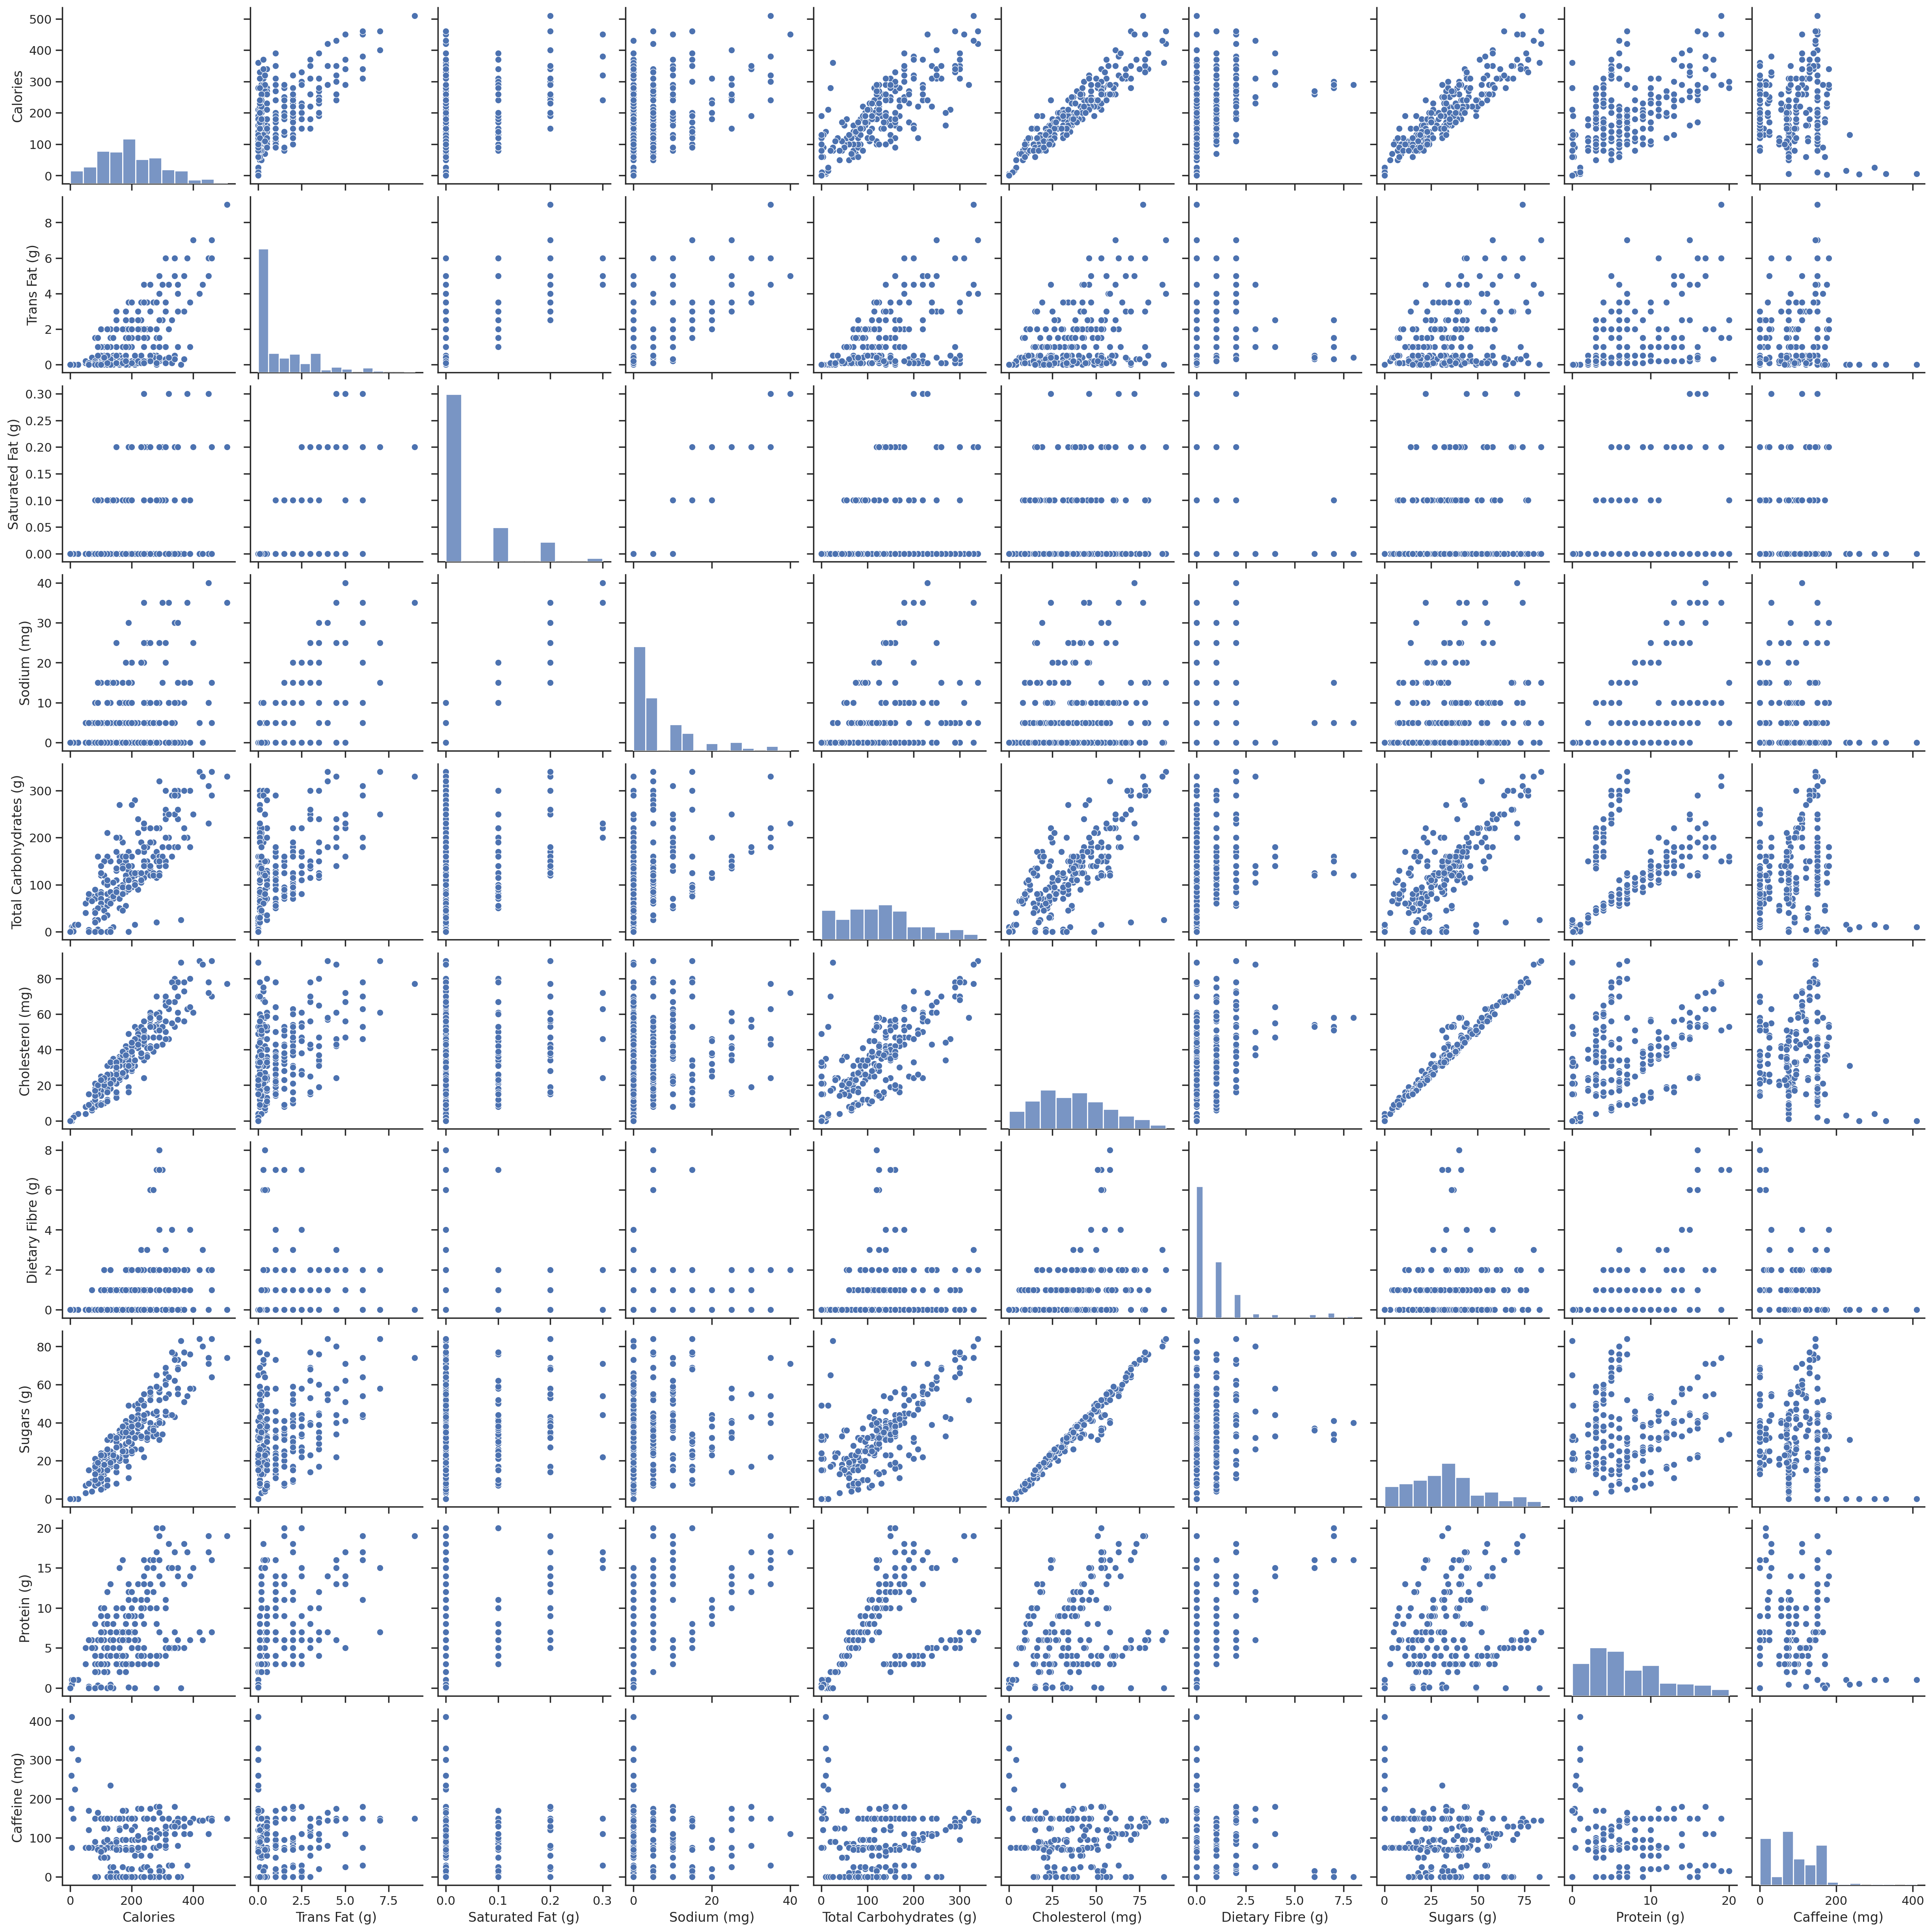

In [34]:
#pair plot
sns.set_theme(style='ticks')
sns.pairplot(data=df_DrinkMenu)
plt.show()

## Challenge 3



In [0]:
# plt.figure(figsize=(15,10))
# sns.set_theme(style='whitegrid')
# sns.scatterplot(data=df_DrinkMenu, x='Caffeine (mg)', y='Sugars (g)', hue='Beverage_category', palette='Spectral').set(xlabel='Caffeine (mg)', ylabel='Sugars (g)', title='Sugar Content versus Calories')
# plt.show()